In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
from nltk.probability import FreqDist
from sklearn.preprocessing import QuantileTransformer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import time
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14

In [2]:
# import scipy.sparse as spr

In [3]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

In [4]:
import csv

---
# 용준이형 추천 가수 모델 시각화 실험

In [5]:
w2v_model = Word2Vec.load('data/artist_w2v.model')
w2v_model

x = np.array([w2v_model.wv[v] for v in w2v_model.wv.vocab.keys()])
# print(x.shape)

x.shape

(99656, 100)

In [6]:
df = pd.read_csv('data/artist_w2v_id.csv', encoding='utf-8-sig')

In [7]:
w2v_model.wv.most_similar('BIGBANG')

[('G-DRAGON', 0.9170671701431274),
 ('2NE1', 0.8961181640625),
 ('싸이 (PSY)', 0.8866357803344727),
 ('원더걸스', 0.8784023523330688),
 ('블락비 (Block B)', 0.877011775970459),
 ('태양', 0.8642700910568237),
 ('SHINee (샤이니)', 0.8590946793556213),
 ('GD&TOP', 0.8480933904647827),
 ('비', 0.8395901918411255),
 ('설아', 0.8349094390869141)]

In [8]:
tsne = TSNE(n_components=2, random_state=42).fit_transform(x)

df_tsne=pd.DataFrame(tsne)

df_tsne.to_csv('data/df_tsne_rs42.csv',index=False)

In [9]:
df_tsne = pd.read_csv('data/df_tsne_rs42.csv', encoding='utf-8-sig')

In [10]:
df_tsne

,0,1
0,-10.896557,14.380874
1,-0.035491,11.562959
2,-41.447260,-16.994850
3,-9.173995,11.212280
4,2.994512,18.691738
...,...,...
99651,-16.777390,32.231518
99652,-16.802353,32.180927
99653,9.527665,-28.156376
99654,-5.887691,14.095642


In [11]:
df_tsne.iloc[0][0]

-10.896557

Phoenix
Phoenix [-10.896557  14.380874]


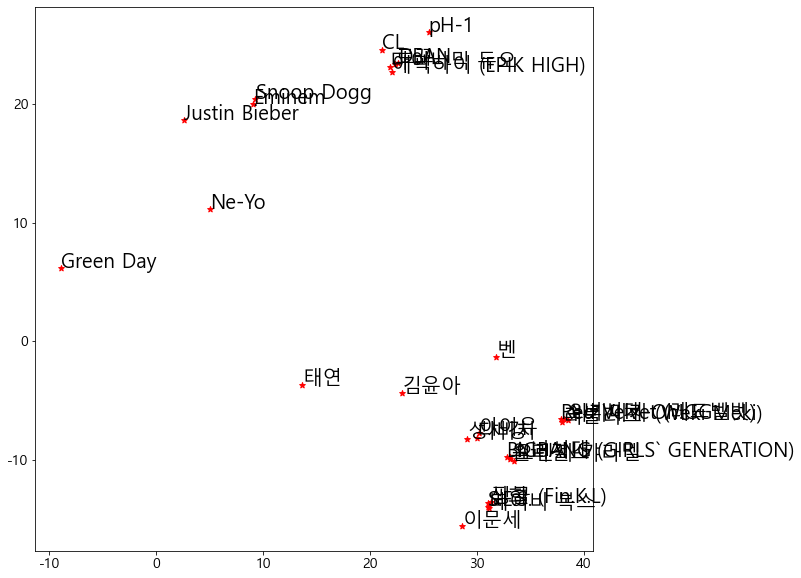

In [12]:
label = list(w2v_model.wv.vocab.keys())
print(label[0])
print(label[0], tsne[0,:])

plt.figure(figsize=(10,10))
for i in [65, 127, 245, 269, 322, 484, 613, 785, 975, 107, 103,106,23304,172,179,197,243,255,253,252,279,260,366,379,439,441,457,466,464, 483] :
    plt.scatter(tsne[i,0], tsne[i,1], marker='*', color='red')
    plt.text( tsne[i,0]+0.01, tsne[i, 1]+0.03, label[i], fontsize=20)

Phoenix
Phoenix 0   -10.896557
1    14.380874
Name: 0, dtype: float64


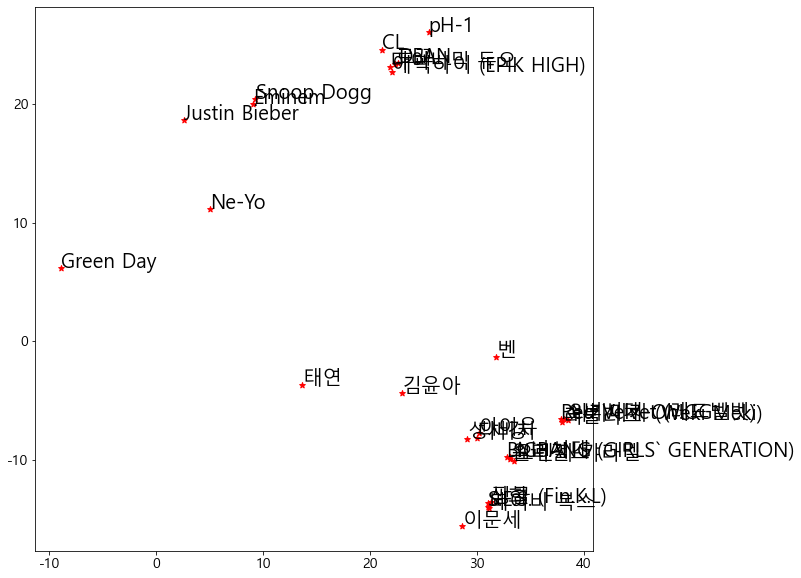

In [13]:
label = list(w2v_model.wv.vocab.keys())
print(label[0])
print(label[0], df_tsne.iloc[0,:])

plt.figure(figsize=(10,10))
for i in [65, 127, 245, 269, 322, 484, 613, 785, 975, 107, 103,106,23304,172,179,197,243,255,253,252,279,260,366,379,439,441,457,466,464, 483] :
    plt.scatter(df_tsne.iloc[i][0], df_tsne.iloc[i][1], marker='*', color='red')
    plt.text( df_tsne.iloc[i][0]+0.01, df_tsne.iloc[i][1]+0.03, label[i], fontsize=20)

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2).fit_transform(x)

tsne_df = pd.DataFrame({'x': tsne[:, 0], 'y':tsne[:, 1]})

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x = 'x', y = 'y',
    hue = 'classes',
    palette = sns.color_palette("Set1", 10),
    data = tsne_df,
    legend = "full",
    alpha = 0.4
)

plt.title("tSNE")

plt.savefig('HW6/TSNE.png', bbox_inches='tight')  
plt.show()

ValueError: Could not interpret value `classes` for parameter `hue`

<Figure size 1152x720 with 0 Axes>